This notebook generates RDM GIFs given a rdm directory

In [1]:
rdm_dir_path = '../../output/cliphba_dynamic_66d_official_v2/things/rdms_-100ms-1300ms-5step.npy'
# rdm_dir_path  = '../Data/ThingsMEG_RDMs/ThingsMEG_RDM_4P.npy'
dataset = 'hba_dora66'
model_timepoints_list = list(range(-100, 1301, 5))

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import imageio
from tqdm import tqdm

def load_dynamic_rdms(dynamic_rdm_dir):
    rdms = np.load(dynamic_rdm_dir)
    
    return rdms

def plot_rdms(rdms, timepoints, n_cols=5):
    # input rdms shape is (timepoints, n_stimuli, n_stimuli), plot all n_stimuli x n_stimuli RDMs for each timepoint
    n_timepoints = len(timepoints)
    n_rows = int(np.ceil(n_timepoints / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
    for i, ax in enumerate(axes.flat):
        if i < n_timepoints:
            im = ax.imshow(rdms[i], cmap='viridis_r')
            ax.set_title(f'{timepoints[i]} ms')
            ax.axis('off')
        else:
            ax.axis('off')
    fig.tight_layout()
    plt.show()

def plot_rdms_to_gif(rdms, timepoints, dataset='THINGs', fps =24):
    # Directory to store the temporary images
    temp_dir = 'temp_rdms'
    os.makedirs(temp_dir, exist_ok=True)
    
    images = []
    
    for i in tqdm(range(len(timepoints)), desc='Creating frames'):
        fig, ax = plt.subplots(figsize=(8, 8))  # Increased figure size for larger RDM
        
        # Display the RDM
        im = ax.imshow(rdms[i], cmap='viridis_r', vmin=0, vmax=1)
        
        # Center the RDM by turning off the axis ticks and labels
        ax.axis('off')
        
        # Add a title centered above the RDM
        ax.set_title(f'{dataset} - {timepoints[i]} ms', fontsize=16, pad=20)
        
        # Save the figure as a PNG file
        temp_file = os.path.join(temp_dir, f'rdm_{i}.png')
        plt.savefig(temp_file, bbox_inches='tight', pad_inches=0.1)
        plt.close(fig)
        
        # Add the file to the images list
        images.append(temp_file)
    
    # Save images as a GIF using imageio
    gif_path = f"./temp_rdms/{dataset}.gif"
    imageio.mimsave(gif_path, [imageio.imread(img) for img in images], fps=fps)
    
    # Clean up temporary files
    for temp_file in images:
        os.remove(temp_file)
    
    print(f"GIF saved at {gif_path}")

In [3]:
rdms = load_dynamic_rdms(rdm_dir_path)
if len(rdms.shape) == 4:
    rdms = np.mean(rdms, axis=0)
print(rdms.shape)

(281, 1854, 1854)


In [4]:
def plot_rdm_intervals(rdms, start_time=-100, end_time=1300, interval=100, step=5):
    """
    Plot RDMs at specified time intervals along a time axis.

    Parameters:
    - rdms: np.ndarray
        The RDMs array of shape (281, 1854, 1854).
    - start_time: int
        The starting timepoint (default: -100 ms).
    - end_time: int
        The ending timepoint (default: 1300 ms).
    - interval: int
        The interval (in ms) to select RDMs for plotting (default: 100 ms).
    - step: int
        The step size between timepoints in the RDMs array (default: 5 ms).
    """
    # Compute indices corresponding to the desired timepoints
    selected_timepoints = list(range(start_time, end_time + 1, interval))
    selected_indices = [(time - start_time) // step for time in selected_timepoints]

    # Number of RDMs to plot
    n_timepoints = len(selected_timepoints)

    # Plot RDMs along the time axis
    fig, axes = plt.subplots(3, 5, figsize=(5, 5))
    for i, ax in enumerate(axes.flat):
        idx = selected_indices[i]
        im = ax.imshow(rdms[idx], cmap='viridis_r', vmin=0, vmax=1)
        ax.set_title(f'{selected_timepoints[i]} ms')
        ax.axis('off')

    # # Add a colorbar for the last plot
    # cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
    # cbar.set_label('RDM Similarity')

    fig.tight_layout()
    plt.show()


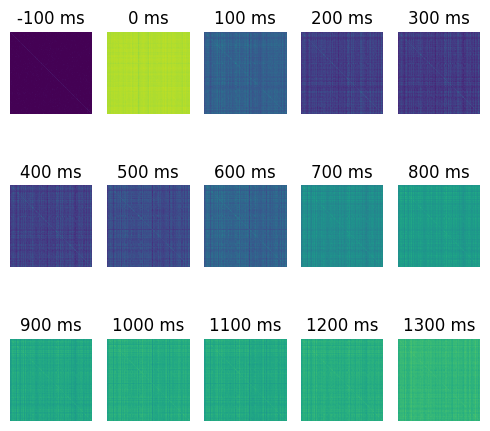

In [5]:
plot_rdm_intervals(rdms, start_time=-100, end_time=1300, interval=100, step=5)

In [6]:
plot_rdms_to_gif(rdms, model_timepoints_list, dataset=dataset, fps=30)

Creating frames: 100%|██████████| 281/281 [02:01<00:00,  2.32it/s]
C:\Users\BrainInspired\AppData\Local\Temp\ipykernel_43436\2401196961.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave(gif_path, [imageio.imread(img) for img in images], fps=fps)


GIF saved at ./temp_rdms/hba_dora66.gif
